# SI 330 - Homework 3: AWS, RDS, MySQL, and Visualization
## Top-level goal:
To explore the goodreads database that we created during the past few classes.

**NOTE**: You will need to review your notebooks from the past few classes to complete this assignment.

Take a look at the first few entries in the ```books``` table.  Specifically, take a look at the ```authors``` field.  

You'll notice that some entries contain multiple authors such as:
>  'Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday'

(that's from iloc[14])

Note too that some non-ASCII characters in the author names are misformed.  That's my fault and can be ignored for the purposes of this assignment.

Your task is to "break out" those authors into a separate dataframe, then use either merge, join, or any other functionality from pandas to answer the following questions.  Please note that there are multiple ways to figure out the answers.  You can, of course, choose to do things in a "pythonic" way rather than a "pandorable" way, but it will be more difficult to get full points if you do so.

You will also need to use some of the visualization techniques we learned when we covered matplotlib a few weeks ago.

In [389]:
import pymysql
import pandas as pd

In [390]:
connection = pymysql.connect(host='si330-sabomj-instance.cxsm6mrn5cd8.us-east-1.rds.amazonaws.com', # remove this before submitting
                             user='sabomj', # remove this before submitting
                             password='********', # remove this before submitting
                             db='goodreads',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

### Q1: How many unique authors are there?

In [391]:
df = pd.read_sql('SELECT authors FROM books',con=connection)
df_list = df['authors'].tolist()

new_list = []
for x in df_list:
    new_list.extend(x.split(", "))
#new_list

In [392]:
unique = pd.DataFrame(new_list)
unique.columns =['authors']
#unique
unique['authors'].nunique()

5707

There are 5,707 unique authors.

### Q2: Create a barchart that has the number of authors from 1 to n across the horizontal axis and the number of books having that number of authors as the vertical axis.

In [393]:
unique['#'] = (unique['authors'].str.count(',')) + 1

In [394]:
amount_df = pd.DataFrame(count_authors['#'].value_counts())
amount_df

,#
1,3061
2,1105
3,318
4,99
5,33
7,23
6,23
8,7


[Text(0, 0.5, '# of Books with x Authors'), Text(0.5, 0, '# of Authors')]

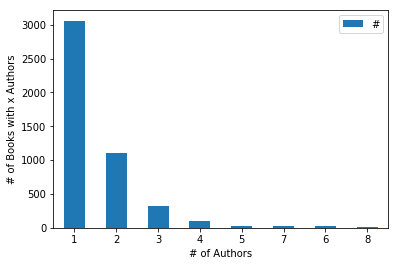

In [395]:
ax = amount_df.plot.bar(y='#',rot=0)
ax.set(xlabel="# of Authors", ylabel="# of Books with x Authors")

### Q3: How many books as J.K. Rowling co-authored with someone else?

In [396]:
jk_rowling = []
for x in df['authors']:
    if 'J.K. Rowling' in x:
        jk_rowling.append(x)
jk_rowling

['J.K. Rowling, Mary GrandPrÃ©',
 'J.K. Rowling, Mary GrandPrÃ©, Rufus Beck',
 'J.K. Rowling, Mary GrandPrÃ©',
 'J.K. Rowling, Mary GrandPrÃ©',
 'J.K. Rowling, Mary GrandPrÃ©',
 'J.K. Rowling, Mary GrandPrÃ©',
 'J.K. Rowling, Mary GrandPrÃ©',
 'Robert Galbraith, J.K. Rowling',
 'John Tiffany, Jack Thorne, J.K. Rowling',
 'J.K. Rowling',
 'J.K. Rowling',
 'J.K. Rowling',
 'Newt Scamander, J.K. Rowling, Albus Dumbledore',
 'Robert Galbraith, J.K. Rowling',
 'Robert Galbraith, J.K. Rowling',
 'Kennilworthy Whisp, J.K. Rowling',
 'J.K. Rowling, Mary GrandPrÃ©',
 'J.K. Rowling, Mary GrandPrÃ©',
 'J.K. Rowling',
 'J.K. Rowling',
 'J.K. Rowling',
 'J.K. Rowling, MinaLima',
 'J.K. Rowling, MinaLima',
 'J.K. Rowling',
 'J.K. Rowling, Joel Holland',
 'Melissa Anelli, J.K. Rowling',
 'J.K. Rowling']

In [397]:
count = []
for x in jk_rowling:
    if x != 'J.K. Rowling':
        count.append(x)
len(count)

19

J.K. Rowling has co-authored with someone else in 19 books.

### Q4: Who has co-authored books with J.K Rowling?

In [398]:
split_authors = []
for x in jk_rowling:
    split_authors.extend(x.split(", "))
#split_authors

In [399]:
not_jk = pd.DataFrame(split_authors)
not_jk.columns = ['author']
not_jk['author'].drop_duplicates()

0     J.K. Rowling      
1     Mary GrandPrÃ©    
4     Rufus Beck        
15    Robert Galbraith  
17    John Tiffany      
18    Jack Thorne       
23    Newt Scamander    
25    Albus Dumbledore  
30    Kennilworthy Whisp
40    MinaLima          
45    Joel Holland      
46    Melissa Anelli    
Name: author, dtype: object

Mary GrandPre, Rufus Beck, Robert Galbraith, John Tiffany, Jack Thorne, Newt Scamander, Albus Dumbledor, Kennilworthy Whisp, MinaLima, Joel Holland, and Melissa Anelli

### Q5: Which book has the largest number of authors?  How many authors?  Who are the authors?

In [402]:
most = pd.read_sql('SELECT  authors, original_title FROM books', con=connection)
most['#'] = most['authors'].str.count(',')+1
pd.set_option('display.max_colwidth', -1)
eight_authors = most.sort_values(by='#', ascending = False).head(7)
eight_authors

,authors,original_title,#
3394,"Neil Gaiman, Marc Hempel, Richard Case, D'Israeli, Teddy Kristiansen, Glyn Dillon, Charles Vess, Dea",The Sandman: The Kindly Ones,8
2936,"Neil Gaiman, Shawn McManus, Colleen Doran, Bryan Talbot, George Pratt, Stan Woch, Dick Giordano, Tod",The Sandman: A Game of You,8
3085,"Neil Gaiman, Bryan Talbot, Stan Woch, P. Craig Russell, Shawn McManus, John Watkiss, Jill Thompson,",The Sandman: Fables and Reflections,8
1095,"Jon Stewart, Ben Karlin, David Javerbaum, Rich Bloomquist, Steve Bodow, Tim Carvell, Eric Drysdale,",America (The Book): A Citizen's Guide to Democracy Inaction,8
4154,"Jon Stewart, Rory Albanese, Kevin Bleyer, Rich Bloomquist, Steve Bodow, Tim Carvell, Wyatt Cenac, Ha",Earth: A Visitor's Guide to the Human Race,8
3395,"Neil Gaiman, Mike Allred, Gary Amaro, Mark Buckingham, David Giordano, Tony Harris, Steve Leialoha,",The Sandman: Worlds' End,8
4938,"Franz Kafka, Nahum N. Glatzer, John Updike, Willa Muir, Edwin Muir, Tania Stern, James Stern, Ernst",SÃ¤mtliche ErzÃ¤hlungen,8


In [403]:
print (eight_authors['original_title'] + ' by ' + eight_authors['authors'])

3394    The Sandman: The Kindly Ones by Neil Gaiman, Marc Hempel, Richard Case, D'Israeli, Teddy Kristiansen, Glyn Dillon, Charles Vess, Dea                               
2936    The Sandman: A Game of You by Neil Gaiman, Shawn McManus, Colleen Doran, Bryan Talbot, George Pratt, Stan Woch, Dick Giordano, Tod                                 
3085    The Sandman: Fables and Reflections by Neil Gaiman, Bryan Talbot, Stan Woch, P. Craig Russell, Shawn McManus, John Watkiss, Jill Thompson,                         
1095    America (The Book): A Citizen's Guide to Democracy Inaction by Jon Stewart, Ben Karlin, David Javerbaum, Rich Bloomquist, Steve Bodow, Tim Carvell, Eric Drysdale, 
4154    Earth: A Visitor's Guide to the Human Race  by Jon Stewart, Rory Albanese, Kevin Bleyer, Rich Bloomquist, Steve Bodow, Tim Carvell, Wyatt Cenac, Ha                
3395    The Sandman: Worlds' End by Neil Gaiman, Mike Allred, Gary Amaro, Mark Buckingham, David Giordano, Tony Harris, Steve Leialoha,     

### Q6: Which author's books have been tagged with the largest number of unique tags?

In [404]:
tags = pd.read_sql("""
                SELECT books.authors, tags.tag_name  
                FROM books
                LEFT JOIN books_tags on books_tags.goodreads_book_id = books.goodreads_book_id
                LEFT JOIN tags on tags.tag_id = books_tags.tag_id 
                """, con = connection)


In [405]:
unique_t = tags.groupby(['authors']).sum()
#unique_t.head()

In [406]:
unique_t['tag_names'] = unique_t['tag_name'].str.split('\r')
#unique_t
unique_t['lengths'] = unique_t['tag_names'].apply(lambda x: len(set(x)))
#unique_t.head()

In [407]:
#unique_t.sort_values(by=['length'], ascending = False).head(1)

Stephen King has the most unique tags.